In [87]:
import pandas as pd

testdf = pd.read_csv("/Users/luc/Desktop/Northwestern/2025 Winter Quarter /MLDS 420 Machine Learning II/store-sales-time-series-forecasting/test.csv")
traindf = pd.read_csv("/Users/luc/Desktop/Northwestern/2025 Winter Quarter /MLDS 420 Machine Learning II/store-sales-time-series-forecasting/train.csv")
storesdf = pd.read_csv("/Users/luc/Desktop/Northwestern/2025 Winter Quarter /MLDS 420 Machine Learning II/store-sales-time-series-forecasting/stores.csv")
oildf = pd.read_csv("/Users/luc/Desktop/Northwestern/2025 Winter Quarter /MLDS 420 Machine Learning II/store-sales-time-series-forecasting/oil.csv")
testdf.head()


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [46]:
traindf.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [49]:
storesdf.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [89]:
oildf.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [51]:
print("\nMissing Values in Train Data:")
print(traindf.isnull().sum())

print("\nMissing Values in Test Data:")
print(testdf.isnull().sum())



Missing Values in Train Data:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing Values in Test Data:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [65]:
print("\nTrain Data Summary:")
traindf.describe()


Train Data Summary:


,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [67]:
print("\nTest Data Summary:")
testdf.describe()


Test Data Summary:


,id,date,store_nbr,onpromotion
count,2.851200e+04,28512,28512.000000,28512.000000
mean,3.015144e+06,2017-08-23 12:00:00,27.500000,6.965383
min,3.000888e+06,2017-08-16 00:00:00,1.000000,0.000000
25%,3.008016e+06,2017-08-19 18:00:00,14.000000,0.000000
50%,3.015144e+06,2017-08-23 12:00:00,27.500000,0.000000
75%,3.022271e+06,2017-08-27 06:00:00,41.000000,6.000000
max,3.029399e+06,2017-08-31 00:00:00,54.000000,646.000000
std,8.230850e+03,NaN,15.586057,20.683952


In [69]:
print("\nStores Data Summary:")
storesdf.describe()



Stores Data Summary:


,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [91]:
print("\noil Data Summary:")
oildf.describe()


oil Data Summary:


,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [73]:
# Merge train and stores data on 'store_nbr'
merged_df = pd.merge(traindf, storesdf, on='store_nbr', how='left')

# Display the first few rows of the merged dataframe
print("\nMerged Data:")
print(merged_df.head())



Merged Data:
   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type  cluster  
0    D       13  
1    D       13  
2    D       13  
3    D       13  
4    D       13  


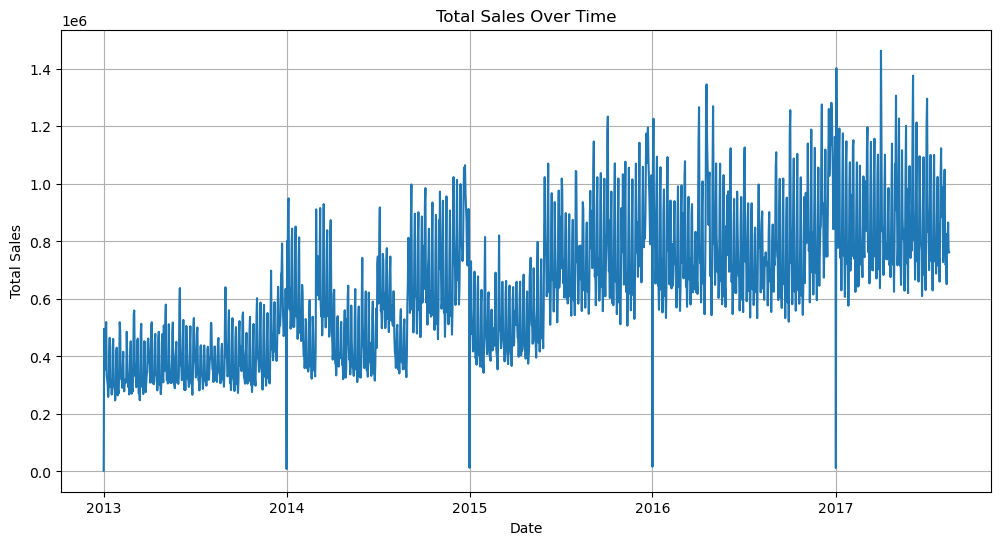

In [75]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Group by date and calculate total sales
sales_over_time = merged_df.groupby('date')['sales'].sum()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


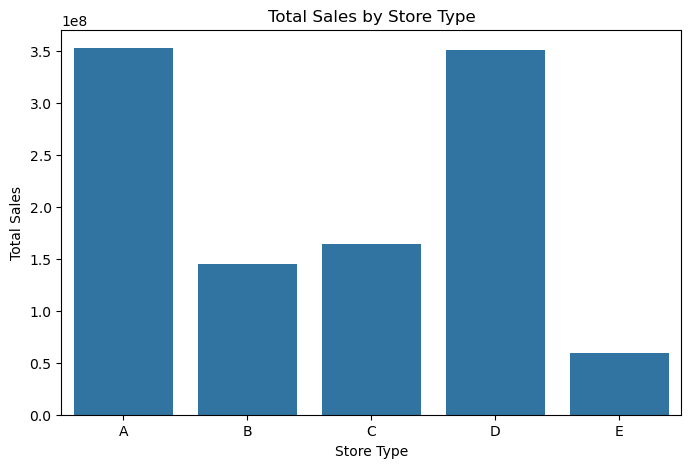

In [77]:
import seaborn as sns

# Group by store type and calculate total sales
sales_by_type = merged_df.groupby('type')['sales'].sum().reset_index()

# Plot sales by store type
plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='sales', data=sales_by_type)
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.show()


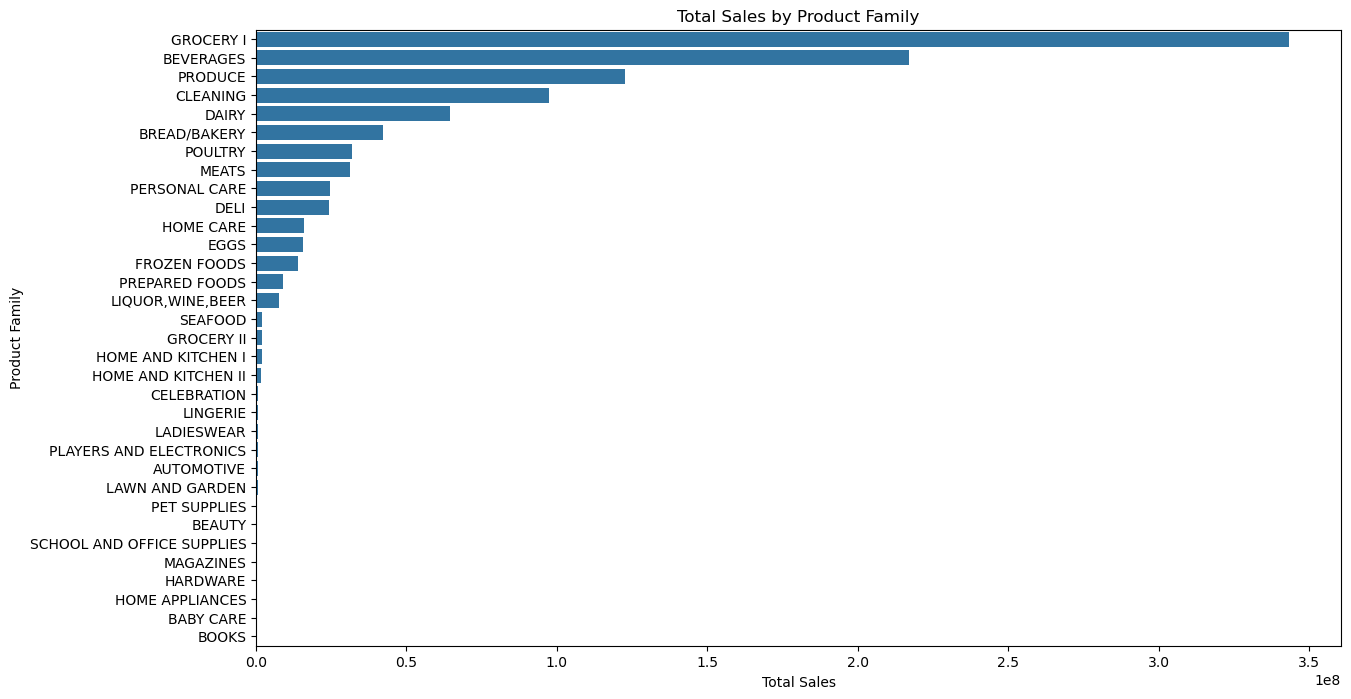

In [79]:
# Group by family and calculate total sales
sales_by_family = merged_df.groupby('family')['sales'].sum().reset_index()

# Plot sales by family
plt.figure(figsize=(14, 8))
sns.barplot(y='family', x='sales', data=sales_by_family.sort_values('sales', ascending=False))
plt.title('Total Sales by Product Family')
plt.xlabel('Total Sales')
plt.ylabel('Product Family')
plt.show()


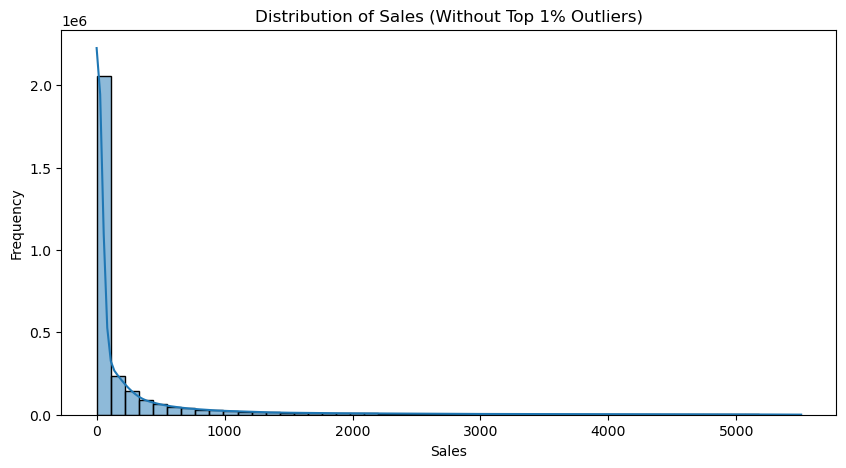

In [55]:
# Remove extreme values (keeping 99% percentile)
upper_limit = traindf["sales"].quantile(0.99)
filtered_sales = traindf[traindf["sales"] < upper_limit]["sales"]

plt.figure(figsize=(10, 5))
sns.histplot(filtered_sales, bins=50, kde=True)
plt.title("Distribution of Sales (Without Top 1% Outliers)")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


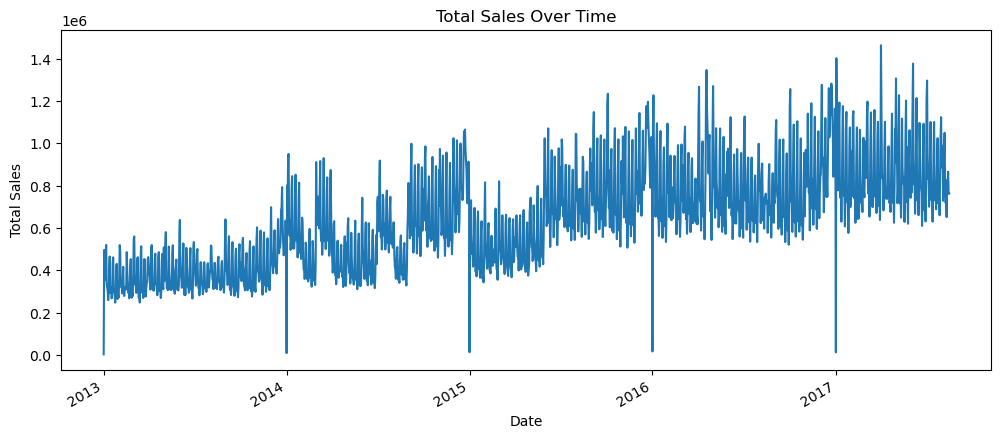

In [56]:
# Convert date column to datetime
traindf["date"] = pd.to_datetime(traindf["date"])
testdf["date"] = pd.to_datetime(testdf["date"])

# Plot sales over time
plt.figure(figsize=(12, 5))
traindf.groupby("date")["sales"].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


/var/folders/kn/ny_h79r153s80331qf6d3p3r0000gn/T/ipykernel_28570/3266749119.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="onpromotion", y="sales", data=promotion_sales, palette=["blue", "red"])


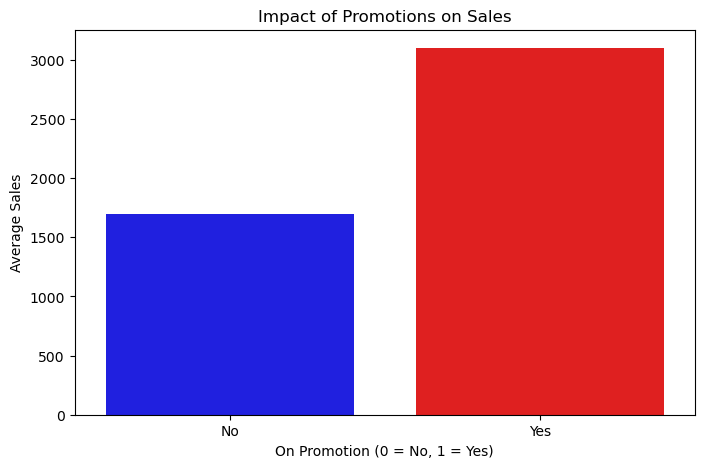

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simulated data: You should replace this with actual data
# Assuming `merged_df` is the dataset containing `onpromotion` and `sales`
# Here is a sample structure for demonstration purposes
data = {
    "onpromotion": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    "sales": [1500, 3000, 1800, 3200, 1700, 3100, 1900, 3300, 1600, 2900]
}

merged_df = pd.DataFrame(data)

# Aggregate sales by promotion status
promotion_sales = merged_df.groupby("onpromotion")["sales"].mean().reset_index()

# Improved bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="onpromotion", y="sales", data=promotion_sales, palette=["blue", "red"])

# Improve readability
plt.title("Impact of Promotions on Sales")
plt.xlabel("On Promotion (0 = No, 1 = Yes)")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ["No", "Yes"])

# Show the plot
plt.show()


In [97]:
# Convert 'date' column to datetime format
oildf["date"] = pd.to_datetime(oildf["date"])


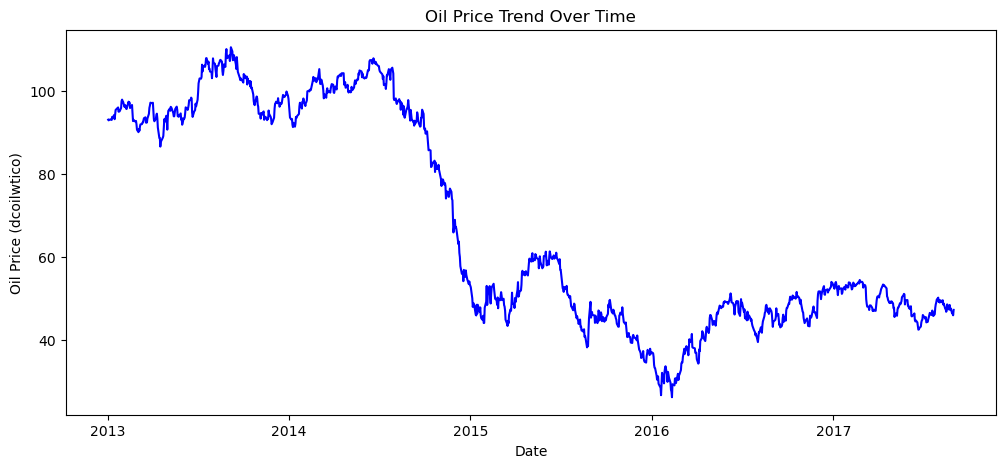

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot oil prices over time
plt.figure(figsize=(12, 5))
sns.lineplot(x="date", y="dcoilwtico", data=oildf, color="blue")

plt.title("Oil Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Oil Price (dcoilwtico)")
plt.show()


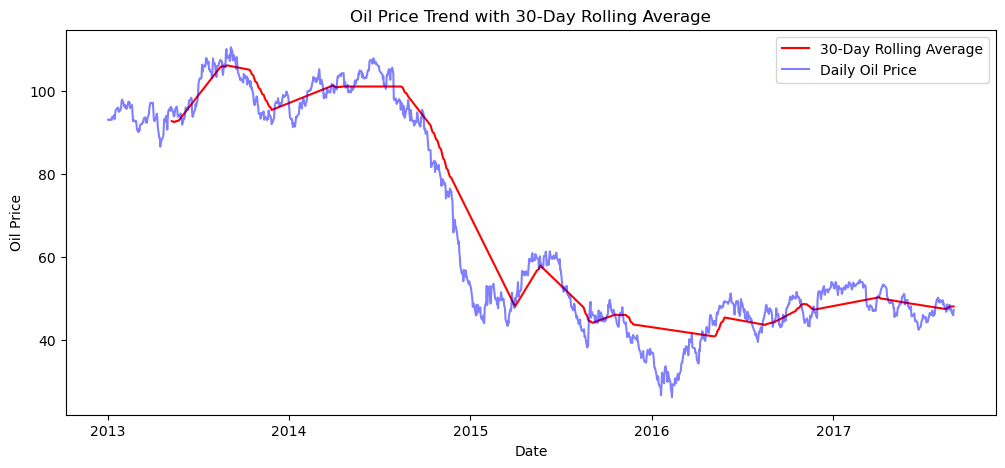

In [107]:
# Calculate rolling average (30-day window)
oildf["rolling_avg"] = oildf["dcoilwtico"].rolling(window=30).mean()

# Plot rolling average
plt.figure(figsize=(12, 5))
sns.lineplot(x="date", y="rolling_avg", data=oildf, color="red", label="30-Day Rolling Average")
sns.lineplot(x="date", y="dcoilwtico", data=oildf, color="blue", alpha=0.5, label="Daily Oil Price")

plt.title("Oil Price Trend with 30-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.legend()
plt.show()


In [113]:
# Assuming train_df is already loaded
traindf["date"] = pd.to_datetime(traindf["date"])
mergeddf = pd.merge(traindf, oildf, on="date", how="left")

# Display merged data
print("\nMerged Train and Oil Data:")
print(merged_df.head())



Merged Train and Oil Data:
   onpromotion  sales
0            0   1500
1            1   3000
2            0   1800
3            1   3200
4            0   1700


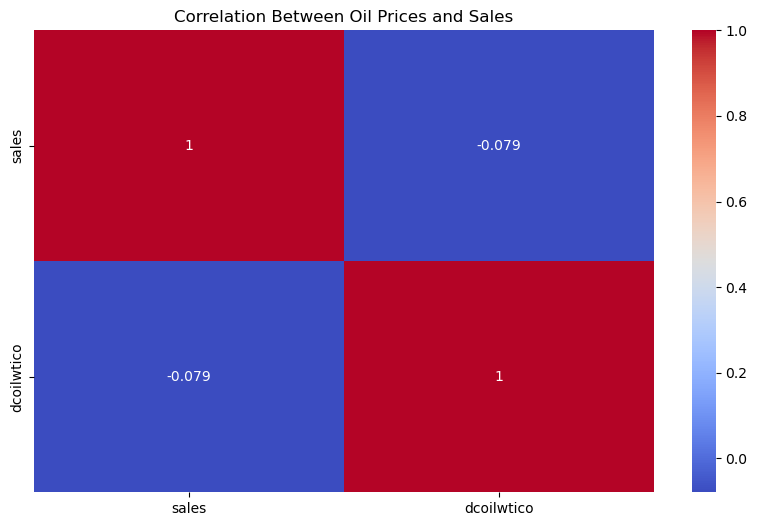

In [115]:
plt.figure(figsize=(10, 6))
sns.heatmap(mergeddf[["sales", "dcoilwtico"]].corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Between Oil Prices and Sales")
plt.show()
